In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import warnings
warnings.filterwarnings('ignore')

In [3]:
#研究12读取
def read_and_format_data(base_path, param_names):
    data = []

    for main_folder in ['init', 'qb']:
        main_path = os.path.join(base_path, main_folder)
        for size_level_folder in os.listdir(main_path):
            size_level_path = os.path.join(main_path, size_level_folder)
            if os.path.isdir(size_level_path):
                samplesize = size_level_folder.split('_')[2]
                level = size_level_folder.split('_')[4]
                for csv_file in os.listdir(size_level_path):
                    if 'mean' in csv_file:
                        depth = csv_file.split('_')[1]
                        act_function = csv_file.split('_')[3]
                        act_function_short = ''.join([word[0].upper() for word in act_function.split('-')])
                        method = f"{main_folder[0].upper()}_{depth}H_{act_function_short}"
                        
                        file_path = os.path.join(size_level_path, csv_file)
                        df = pd.read_csv(file_path, index_col=0)

                        for param in param_names:
                            mse = df.loc[param, 'MSE']
                            bias = df.loc[param, 'Bias']
                            data.append([samplesize, param, level, method, mse, bias])
    
    formatted_df = pd.DataFrame(data, columns=['SampleSize', 'Parameter', 'Level', 'Method', 'MSE', 'Bias'])
    return formatted_df

In [4]:
#研究3读取
def read_data_from_directory(base_dir):
    data_list = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if 'mean' in file and file.endswith('.csv') and 'leakyrelu' not in file:
                file_path = os.path.join(root, file)
                depth = int(file.split('_')[1])
                activation = file.split('_')[3]
                df = pd.read_csv(file_path, index_col=0)
                
                folder_name = os.path.basename(root)
                samplesize = int(folder_name.split('_')[2])
                levels = int(folder_name.split('_')[4])

                for param in df.index:
                    mse = df.loc[param, 'MSE']
                    bias = df.loc[param, 'Bias']
                    data_dict = {
                        'Level': levels,
                        'Activation': activation,
                        'Depth': depth,
                        'SampleSize': samplesize,
                        'Parameter': param,
                        'MSE': mse,
                        'Bias': bias
                    }
                    data_list.append(data_dict)
    
    return pd.DataFrame(data_list)

In [5]:
#研究12读取
def read_and_format_data_2(base_path, param_names):
    data = []
    for main_folder in ['qb', 'qb_batch']:
        main_path = os.path.join(base_path, main_folder)
        for size_level_folder in os.listdir(main_path):
            size_level_path = os.path.join(main_path, size_level_folder)
            if os.path.isdir(size_level_path):
                samplesize = size_level_folder.split('_')[2]
                level = size_level_folder.split('_')[4]
                items = os.listdir(size_level_path)
                csv_files=[item for item in items if os.path.isfile(os.path.join(directory, item)) and item.endswith('.csv')]
                for csv_file in csv_files:
                for csv_file in os.listdir(size_level_path):
                    if 'mean' in csv_file:
                        depth = csv_file.split('_')[1]
                        act_function = csv_file.split('_')[3]
                        act_function_short = ''.join([word[0].upper() for word in act_function.split('-')])
                        method = f"{main_folder[0].upper()}_{depth}H_{act_function_short}"
                        
                        file_path = os.path.join(size_level_path, csv_file)
                        df = pd.read_csv(file_path, index_col=0)

                        for param in param_names:
                            mse = df.loc[param, 'MSE']
                            bias = df.loc[param, 'Bias']
                            data.append([samplesize, param, level, method, mse, bias])
    
    formatted_df = pd.DataFrame(data, columns=['SampleSize', 'Parameter', 'Level', 'Method', 'MSE', 'Bias'])
    return formatted_df

IndentationError: expected an indented block after 'for' statement on line 13 (567256502.py, line 17)

In [6]:
def read_and_format_data_2(base_path, param_names):
    data = []
    main_path1 = os.path.join(base_path, 'qb')
    for size_level_folder in os.listdir(main_path1):
        size_level_path = os.path.join(main_path1, size_level_folder)
        if os.path.isdir(size_level_path):
            samplesize = size_level_folder.split('_')[2]
            level = size_level_folder.split('_')[4]
            items = os.listdir(size_level_path)
            csv_files=[item for item in items if os.path.isfile(os.path.join(size_level_path, item)) and item.endswith('.csv')]
            for csv_file in csv_files:
                if 'mean' in csv_file:
                    method='GCEN'
                    file_path = os.path.join(size_level_path, csv_file)
                    df = pd.read_csv(file_path, index_col=0)
                    for param in param_names:
                        mse = df.loc[param, 'MSE']
                        bias = df.loc[param, 'Bias']
                        data.append([samplesize, param, level, method, mse, bias])
    main_path2=os.path.join(base_path, 'qb_batch')
    for size_level_folder in os.listdir(main_path2):
        size_level_path = os.path.join(main_path2, size_level_folder)
        if os.path.isdir(size_level_path):
            level = size_level_folder.split('_')[4]
            items = os.listdir(size_level_path)
            csv_files=[item for item in items if os.path.isfile(os.path.join(size_level_path, item)) and item.endswith('.csv')]
            for csv_file in csv_files:
                if 'MEAN' in csv_file:
                    sample=csv_file.split('_')[2]
                    strategy=csv_file.split('_')[4][0]
                    method=f's_{sample}_s_{strategy}'
                    file_path = os.path.join(size_level_path, csv_file)
                    df = pd.read_csv(file_path, index_col=0)
                    for param in param_names:
                        mse = df.loc[param, 'MSE']
                        bias = df.loc[param, 'Bias']
                        data.append([samplesize, param, level, method, mse, bias])
    formatted_df = pd.DataFrame(data, columns=['SampleSize', 'Parameter', 'Level', 'Method', 'MSE', 'Bias'])
    return formatted_df
    

In [7]:
#研究12画图
def plot_mse_bias(df, param_names, mse_ylim, mse_beyond, bias_ylim, bias_beyond, figsize=(18, 12),filename='研究1效果图.png',method_labels=None):
    methods = df['Method'].unique()
    #print(methods)
    shapes = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h'][:len(methods)]  # 动态调整标记数量

    sample_sizes = sorted(df['SampleSize'].unique(), key=lambda x: int(x))  # 对样本量进行数值排序

    # 题目量级也按数值顺序排列
    levels = sorted(df['Level'].unique(), key=lambda x: int(x))

    fig = plt.figure(figsize=figsize)
    gs = GridSpec(2, 1, height_ratios=[1, 1])

    def map_mse_outliers(y, normal_ylim, beyond_ylim):
        if y <= normal_ylim[1]:
            return y
        mapped_y = (y - normal_ylim[1]) / (beyond_ylim[1] - normal_ylim[1]) * 0.2 + normal_ylim[1]
        return mapped_y

    def map_bias_outliers(y, normal_ylim, beyond_ylim):
        if y > normal_ylim[1]:
            mapped_y = (y - normal_ylim[1]) / (beyond_ylim[1] - normal_ylim[1]) * 0.1 + normal_ylim[1]
            return mapped_y
        elif y < normal_ylim[0]:
            mapped_y = (y - normal_ylim[0]) / (normal_ylim[0] - beyond_ylim[0]) * 0.1 + normal_ylim[0]
            return mapped_y
        return y

    new_mse_ylim = (mse_ylim[0], mse_ylim[1] + 0.2)
    new_bias_ylim = (bias_ylim[0] - 0.1, bias_ylim[1] + 0.1)
    nrow=len(levels)
    ncol=len(sample_sizes)
    gs_mse = GridSpecFromSubplotSpec(nrow, ncol, subplot_spec=gs[0], wspace=0.03, hspace=0.12)
    for i, sample_size in enumerate(sample_sizes):
        for j, level in enumerate(levels):
            ax = fig.add_subplot(gs_mse[j, i])
            total_params = len(param_names)
            for k, param in enumerate(param_names):
                subset = df[(df['SampleSize'] == sample_size) & (df['Level'] == level) & (df['Parameter'] == param)]
                offset = k * (len(methods) + 1)
                mapped_mse = [map_mse_outliers(y, mse_ylim, mse_beyond) for y in subset['MSE']]
                sns.scatterplot(data=subset, x=[x + offset for x in range(len(subset))], y=mapped_mse, hue='Method', style='Method', markers=shapes, ax=ax, legend=False)
            
            ax.set_ylim(new_mse_ylim)
            
            if j == 2:
                xtick_positions = [(len(methods) + 1) * k + len(methods) / 2 - 0.5 for k in range(total_params)]
                ax.set_xticks(xtick_positions)
                ax.set_xticklabels(param_names)
            else:
                ax.set_xticks([])

            num_ticks = int(np.round((mse_ylim[1] - mse_ylim[0]) / 0.1)) + 1
            normal_mse_yticks = np.linspace(mse_ylim[0], mse_ylim[1], num=num_ticks)
            extended_yticks = np.append(normal_mse_yticks, mse_beyond)
            mapped_yticks = [map_mse_outliers(tick, mse_ylim, mse_beyond) for tick in extended_yticks]
            ax.set_yticks(mapped_yticks)
            ax.set_yticklabels([f'{tick:.1f}' for tick in normal_mse_yticks] + [str(beyond) for beyond in mse_beyond])
            
            ax.set_ylabel('')
            if j == 0:
                ax.set_title(f'{sample_size}', fontsize=12)
            
            ax2 = ax.twinx()
            ax2.set_yticks([])
            if i == 2:
                ax2.set_ylabel(f'{level}', fontsize=12, rotation=270, labelpad=15)
            else:
                ax2.set_ylabel('')
            if i > 0:
                ax.set_yticklabels([])
            ax.grid(True, which='both', axis='y', linestyle='--', linewidth=1, alpha=0.7)

    fig.text(0.04, 0.75, 'MSE', va='center', rotation='vertical', fontsize=14)

    gs_bias = GridSpecFromSubplotSpec(nrow, ncol, subplot_spec=gs[1], wspace=0.03, hspace=0.12)
    for i, sample_size in enumerate(sample_sizes):
        for j, level in enumerate(levels):
            ax = fig.add_subplot(gs_bias[j, i])
            total_params = len(param_names)
            for k, param in enumerate(param_names):
                subset = df[(df['SampleSize'] == sample_size) & (df['Level'] == level) & (df['Parameter'] == param)]
                offset = k * (len(methods) + 1)
                mapped_bias = [map_bias_outliers(y, bias_ylim, bias_beyond) for y in subset['Bias']]
                sns.scatterplot(data=subset, x=[x + offset for x in range(len(subset))], y=mapped_bias, hue='Method', style='Method', markers=shapes, ax=ax, legend=False)
            
            ax.set_ylim(new_bias_ylim)
            
            if j == 3:
                xtick_positions = [(len(methods) + 1) * k + len(methods) / 2 - 0.5 for k in range(total_params)]
                ax.set_xticks(xtick_positions)
                ax.set_xticklabels(param_names)
            else:
                ax.set_xticks([])

            num_ticks = int(np.round((bias_ylim[1] - bias_ylim[0]) / 0.1)) + 1
            normal_bias_yticks = np.linspace(bias_ylim[0], bias_ylim[1], num=num_ticks)
            extended_yticks = np.append(normal_bias_yticks, bias_beyond)
            mapped_yticks = [map_bias_outliers(tick, bias_ylim, bias_beyond) for tick in extended_yticks]
            ax.set_yticks(mapped_yticks)
            ax.set_yticklabels([f'{tick:.1f}' for tick in normal_bias_yticks] + [str(beyond) for beyond in bias_beyond])
            
            ax.set_ylabel('')
            if j == 0:
                ax.set_title(f'{sample_size}', fontsize=12)
            
            ax2 = ax.twinx()
            ax2.set_yticks([])
            if i == 2:
                ax2.set_ylabel(f'{level}', fontsize=12, rotation=270, labelpad=15)
            else:
                ax2.set_ylabel('')
            if i > 0:
                ax.set_yticklabels([])
            ax.grid(True, which='both', axis='y', linestyle='--', linewidth=1, alpha=0.7)

    #method_labels = [f'{method}' for method in methods]
    #method_labels=['C_1H_S','C_3H_S','G_1H_T','G_3H_T']
    method_handles = [plt.Line2D([0], [0], marker=shapes[i], color='w', label=method,
                                 markerfacecolor=sns.color_palette()[i], markersize=10) 
                      for i, method in enumerate(methods)]
    fig.legend(handles=method_handles, labels=method_labels, loc='lower center', ncol=len(method_labels), fontsize=12, frameon=False, handletextpad=1)
    fig.text(0.04, 0.25, 'Bias', va='center', rotation='vertical', fontsize=14)

    plt.subplots_adjust(wspace=0.03, hspace=0.11)
    plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])
    plt.savefig(filename)
    plt.show()

In [8]:
def plot_mse_bias_2(df, param_names, mse_ylim, mse_beyond, bias_ylim, bias_beyond, figsize=(18, 12),filename='研究1效果图.png',method_labels=None):
    methods = df['Method'].unique()
    #print(methods)
    shapes = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h'][:len(methods)]  # 动态调整标记数量

    sample_sizes = sorted(df['SampleSize'].unique(), key=lambda x: int(x))  # 对样本量进行数值排序

    # 题目量级也按数值顺序排列
    levels = sorted(df['Level'].unique(), key=lambda x: int(x))

    fig = plt.figure(figsize=figsize)
    gs = GridSpec(2, 1, height_ratios=[1, 1])

    def map_mse_outliers(y, normal_ylim, beyond_ylim):
        if y <= normal_ylim[1]:
            return y
        mapped_y = (y - normal_ylim[1]) / (beyond_ylim[1] - normal_ylim[1]) * 0.2 + normal_ylim[1]
        return mapped_y

    def map_bias_outliers(y, normal_ylim, beyond_ylim):
        if y > normal_ylim[1]:
            mapped_y = (y - normal_ylim[1]) / (beyond_ylim[1] - normal_ylim[1]) * 0.1 + normal_ylim[1]
            return mapped_y
        elif y < normal_ylim[0]:
            mapped_y = (y - normal_ylim[0]) / (normal_ylim[0] - beyond_ylim[0]) * 0.1 + normal_ylim[0]
            return mapped_y
        return y

    new_mse_ylim = (mse_ylim[0], mse_ylim[1] + 0.2)
    new_bias_ylim = (bias_ylim[0] - 0.1, bias_ylim[1] + 0.1)
    nrow=len(levels)
    ncol=len(sample_sizes)
    gs_mse = GridSpecFromSubplotSpec(nrow, ncol, subplot_spec=gs[0], wspace=0.03, hspace=0.12)
    for i, sample_size in enumerate(sample_sizes):
        for j, level in enumerate(levels):
            ax = fig.add_subplot(gs_mse[j, i])
            total_params = len(param_names)
            for k, param in enumerate(param_names):
                subset = df[(df['SampleSize'] == sample_size) & (df['Level'] == level) & (df['Parameter'] == param)]
                offset = k * (len(methods) + 1)
                mapped_mse = [map_mse_outliers(y, mse_ylim, mse_beyond) for y in subset['MSE']]
                sns.scatterplot(data=subset, x=[x + offset for x in range(len(subset))], y=mapped_mse, hue='Method', style='Method', markers=shapes, ax=ax, legend=False)
            
            ax.set_ylim(new_mse_ylim)
            
            if j == 2:
                xtick_positions = [(len(methods) + 1) * k + len(methods) / 2 - 0.5 for k in range(total_params)]
                ax.set_xticks(xtick_positions)
                ax.set_xticklabels(param_names)
            else:
                ax.set_xticks([])

            num_ticks = int(np.round((mse_ylim[1] - mse_ylim[0]) / 0.1)) + 1
            normal_mse_yticks = np.linspace(mse_ylim[0], mse_ylim[1], num=num_ticks)
            extended_yticks = np.append(normal_mse_yticks, mse_beyond)
            mapped_yticks = [map_mse_outliers(tick, mse_ylim, mse_beyond) for tick in extended_yticks]
            ax.set_yticks(mapped_yticks)
            ax.set_yticklabels([f'{tick:.1f}' for tick in normal_mse_yticks] + [str(beyond) for beyond in mse_beyond])
            
            ax.set_ylabel('')
            if j == 0:
                ax.set_title(f'{sample_size}', fontsize=12)
            
            ax2 = ax.twinx()
            ax2.set_yticks([])
            if i == 0:
                ax2.set_ylabel(f'{level}', fontsize=12, rotation=270, labelpad=15)
            else:
                ax2.set_ylabel('')
            if i > 0:
                ax.set_yticklabels([])
            ax.grid(True, which='both', axis='y', linestyle='--', linewidth=1, alpha=0.7)

    fig.text(0.04, 0.75, 'MSE', va='center', rotation='vertical', fontsize=14)

    gs_bias = GridSpecFromSubplotSpec(nrow, ncol, subplot_spec=gs[1], wspace=0.03, hspace=0.12)
    for i, sample_size in enumerate(sample_sizes):
        for j, level in enumerate(levels):
            ax = fig.add_subplot(gs_bias[j, i])
            total_params = len(param_names)
            for k, param in enumerate(param_names):
                subset = df[(df['SampleSize'] == sample_size) & (df['Level'] == level) & (df['Parameter'] == param)]
                offset = k * (len(methods) + 1)
                mapped_bias = [map_bias_outliers(y, bias_ylim, bias_beyond) for y in subset['Bias']]
                sns.scatterplot(data=subset, x=[x + offset for x in range(len(subset))], y=mapped_bias, hue='Method', style='Method', markers=shapes, ax=ax, legend=False)
            
            ax.set_ylim(new_bias_ylim)
            
            if j == 3:
                xtick_positions = [(len(methods) + 1) * k + len(methods) / 2 - 0.5 for k in range(total_params)]
                ax.set_xticks(xtick_positions)
                ax.set_xticklabels(param_names)
            else:
                ax.set_xticks([])

            num_ticks = int(np.round((bias_ylim[1] - bias_ylim[0]) / 0.1)) + 1
            normal_bias_yticks = np.linspace(bias_ylim[0], bias_ylim[1], num=num_ticks)
            extended_yticks = np.append(normal_bias_yticks, bias_beyond)
            mapped_yticks = [map_bias_outliers(tick, bias_ylim, bias_beyond) for tick in extended_yticks]
            ax.set_yticks(mapped_yticks)
            ax.set_yticklabels([f'{tick:.1f}' for tick in normal_bias_yticks] + [str(beyond) for beyond in bias_beyond])
            
            ax.set_ylabel('')
            if j == 0:
                ax.set_title(f'{sample_size}', fontsize=12)
            
            ax2 = ax.twinx()
            ax2.set_yticks([])
            if i == 2:
                ax2.set_ylabel(f'{level}', fontsize=12, rotation=270, labelpad=15)
            else:
                ax2.set_ylabel('')
            if i > 0:
                ax.set_yticklabels([])
            ax.grid(True, which='both', axis='y', linestyle='--', linewidth=1, alpha=0.7)

    #method_labels = [f'{method}' for method in methods]
    #method_labels=['C_1H_S','C_3H_S','G_1H_T','G_3H_T']
    method_handles = [plt.Line2D([0], [0], marker=shapes[i], color='w', label=method,
                                 markerfacecolor=sns.color_palette()[i], markersize=10) 
                      for i, method in enumerate(methods)]
    fig.legend(handles=method_handles, labels=method_labels, loc='lower center', ncol=len(method_labels), fontsize=12, frameon=False, handletextpad=1)
    fig.text(0.04, 0.25, 'Bias', va='center', rotation='vertical', fontsize=14)

    plt.subplots_adjust(wspace=0.03, hspace=0.11)
    plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])
    plt.savefig(filename)
    plt.show()

In [14]:
def plot_mse(df, figsize, mse_ylim, mse_beyond, bias_ylim, bias_beyond,filename='研究3效果图.png'):
    activation_functions = df['Activation'].unique()
    depths = df['Depth'].unique()
    samplesizes = df['SampleSize'].unique().tolist()
    params = df['Parameter'].unique()
    samplesizes = sorted(df['SampleSize'].unique(), key=lambda x: int(x))
    
    colors = sns.color_palette("husl", len(activation_functions))  # 2种颜色
    markers = ['o', 's', 'D']  # 3种点标记
    def map_mse_outliers(y, normal_ylim, beyond_ylim):
        if y <= normal_ylim[1]:
            return y
        mapped_y = (y - normal_ylim[1]) / (beyond_ylim[1] - normal_ylim[1]) * 0.2 + normal_ylim[1]
        return mapped_y

    def map_bias_outliers(y, normal_ylim, beyond_ylim):
        if y > normal_ylim[1]:
            mapped_y = (y - normal_ylim[1]) / (beyond_ylim[1] - normal_ylim[1]) * 0.1 + normal_ylim[1]
            return mapped_y
        elif y < normal_ylim[0]:
            mapped_y = (y - normal_ylim[0]) / (normal_ylim[0] - beyond_ylim[0]) * 0.1 + normal_ylim[0]
            return mapped_y
        return y

    new_mse_ylim = (mse_ylim[0], mse_ylim[1] + 0.2)
    new_bias_ylim = (bias_ylim[0] - 0.1, bias_ylim[1] + 0.1)

    # 绘制图形，调整为3行5列
    fig, axs = plt.subplots(len(params), len(samplesizes), figsize=figsize, sharex=True)

    # 绘制MSE
    for param_idx, param in enumerate(params):
        for size_idx, size in enumerate(samplesizes):
            row_idx = param_idx
            col_idx = size_idx
            for act_idx, act in enumerate(activation_functions):
                for depth_idx, depth in enumerate(depths):
                    subset = df[(df['Activation'] == act) & (df['Depth'] == depth) & (df['SampleSize'] == size) & (df['Parameter'] == param)]
                    subset['Level']=subset['Level'].replace({10:0,12:5,14:10,16:15,18:20,20:25,25:30,30:35,40:40,50:45,60:50})
                    color = colors[act_idx]
                    marker = markers[depth_idx - 1]  # 根据索引调整
                    mapped_mse = [map_mse_outliers(y, mse_ylim, mse_beyond) for y in subset['MSE']]
                    sns.lineplot(x='Level', y=mapped_mse, data=subset, ax=axs[row_idx, col_idx],
                                 marker=marker, color=color, label='_nolegend_',linewidth=1, markersize=5)
            axs[row_idx, col_idx].set_ylim(new_mse_ylim)  
            num_ticks = int(np.round((mse_ylim[1] - mse_ylim[0]) / 0.1)) + 1
            normal_mse_yticks = np.linspace(mse_ylim[0], mse_ylim[1], num=num_ticks)
            extended_mse_yticks = np.append(normal_mse_yticks, mse_beyond)
            mapped_mse_yticks = [map_mse_outliers(tick, mse_ylim, mse_beyond) for tick in extended_mse_yticks]
            axs[row_idx, col_idx].set_yticks(mapped_mse_yticks)
            axs[row_idx, col_idx].set_yticklabels([f'{tick:.1f}' for tick in normal_mse_yticks] + [str(beyond) for beyond in mse_beyond])
            if row_idx==2:
                axs[row_idx, col_idx].set_xticks([0,5,10,15,20,25,30,35,40,45,50])
                axs[row_idx, col_idx].set_xticklabels(['10','12','14','16','18','20','25','30','40','50','60'])
            if col_idx == 0:
                axs[row_idx, col_idx].set_ylabel(f'MSE ({param})')
            else:
                axs[row_idx, col_idx].set_yticklabels([])
                axs[row_idx, col_idx].set_ylabel('')
            if row_idx==0:
                axs[row_idx, col_idx].set_title(f'{size}')

    # 添加图例
    from matplotlib.lines import Line2D
    legend_elements = []

    # 添加 Activation 图例
    legend_elements.append(Line2D([0], [0], color='w', label='Activation:'))
    for act_idx, act in enumerate(activation_functions):
        legend_elements.append(Line2D([0], [0], color=colors[act_idx], lw=4, label=f'{act}'))

    # 添加 Depth 图例
    legend_elements.append(Line2D([0], [0], color='w', label='Depth:'))
    for depth_idx, depth in enumerate(depths):
        legend_elements.append(Line2D([0], [0], marker=markers[depth_idx - 1], color='w', label=f'{depth}', 
                                      markerfacecolor='k', markersize=10))

    fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.01), ncol=len(legend_elements), fontsize=12, frameon=False)

    for i in range(len(params)):
        for j in range(len(samplesizes)):
            axs[i, j].set_xlabel('')  # 去掉子图的x轴标签
    axs[len(params) - 1, 2].set_xlabel('Items')  # 修改最后一个子图的x轴标签
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig(filename)
    plt.show()

In [18]:
def plot_mse(df, figsize, mse_ylim, mse_beyond, bias_ylim, bias_beyond, filename='研究3效果图.png'):
    activation_functions = df['Activation'].unique()
    depths = df['Depth'].unique()
    samplesizes = df['SampleSize'].unique().tolist()
    params = df['Parameter'].unique()
    samplesizes = sorted(df['SampleSize'].unique(), key=lambda x: int(x))
    
    colors = sns.color_palette("husl", len(activation_functions))  # 颜色与激活函数相关
    markers = ['o', 's', 'D']  # 不同深度使用不同图形标记
    linestyles = ['-', '--']  # 不同激活函数使用不同线型

    def map_mse_outliers(y, normal_ylim, beyond_ylim):
        if y <= normal_ylim[1]:
            return y
        mapped_y = (y - normal_ylim[1]) / (beyond_ylim[1] - normal_ylim[1]) * 0.2 + normal_ylim[1]
        return mapped_y

    def map_bias_outliers(y, normal_ylim, beyond_ylim):
        if y > normal_ylim[1]:
            mapped_y = (y - normal_ylim[1]) / (beyond_ylim[1] - normal_ylim[1]) * 0.1 + normal_ylim[1]
            return mapped_y
        elif y < normal_ylim[0]:
            mapped_y = (y - normal_ylim[0]) / (normal_ylim[0] - beyond_ylim[0]) * 0.1 + normal_ylim[0]
            return mapped_y
        return y

    new_mse_ylim = (mse_ylim[0], mse_ylim[1] + 0.2)
    new_bias_ylim = (bias_ylim[0] - 0.1, bias_ylim[1] + 0.1)

    # 绘制图形，调整为3行5列
    fig, axs = plt.subplots(len(params), len(samplesizes), figsize=figsize, sharex=True)

    # 绘制MSE
    for param_idx, param in enumerate(params):
        for size_idx, size in enumerate(samplesizes):
            row_idx = param_idx
            col_idx = size_idx
            for act_idx, act in enumerate(activation_functions):
                for depth_idx, depth in enumerate(depths):
                    subset = df[(df['Activation'] == act) & (df['Depth'] == depth) & (df['SampleSize'] == size) & (df['Parameter'] == param)]
                    subset['Level'] = subset['Level'].replace({10: 0, 12: 5, 14: 10, 16: 15, 18: 20, 20: 25, 25: 30, 30: 35, 40: 40, 50: 45, 60: 50})
                    color = colors[act_idx]
                    linestyle = linestyles[act_idx]  # 根据激活函数选择线型
                    marker = markers[depth_idx - 1]  # 根据深度选择图形标记
                    mapped_mse = [map_mse_outliers(y, mse_ylim, mse_beyond) for y in subset['MSE']]
                    sns.lineplot(x='Level', y=mapped_mse, data=subset, ax=axs[row_idx, col_idx],
                                 linestyle=linestyle, color=color, marker=marker, label='_nolegend_', linewidth=1)
            axs[row_idx, col_idx].set_ylim(new_mse_ylim)  
            num_ticks = int(np.round((mse_ylim[1] - mse_ylim[0]) / 0.1)) + 1
            normal_mse_yticks = np.linspace(mse_ylim[0], mse_ylim[1], num=num_ticks)
            extended_mse_yticks = np.append(normal_mse_yticks, mse_beyond)
            mapped_mse_yticks = [map_mse_outliers(tick, mse_ylim, mse_beyond) for tick in extended_mse_yticks]
            axs[row_idx, col_idx].set_yticks(mapped_mse_yticks)
            axs[row_idx, col_idx].set_yticklabels([f'{tick:.1f}' for tick in normal_mse_yticks] + [str(beyond) for beyond in mse_beyond])
            if row_idx == 2:
                axs[row_idx, col_idx].set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
                axs[row_idx, col_idx].set_xticklabels(['10', '12', '14', '16', '18', '20', '25', '30', '40', '50', '60'])
            if col_idx == 0:
                axs[row_idx, col_idx].set_ylabel(f'MSE ({param})')
            else:
                axs[row_idx, col_idx].set_yticklabels([])
                axs[row_idx, col_idx].set_ylabel('')
            if row_idx == 0:
                axs[row_idx, col_idx].set_title(f'{size}')

    # 添加图例
    from matplotlib.lines import Line2D
    legend_elements = []

    # 添加激活函数线型图例
    legend_elements.append(Line2D([0], [0], linestyle='-', color='k', lw=2, label='Solid Line (sigmoid)'))
    legend_elements.append(Line2D([0], [0], linestyle='--', color='k', lw=2, label='Dashed Line (tanh)'))

    # 添加深度图形标记图例
    for depth_idx, depth in enumerate(depths):
        legend_elements.append(Line2D([0], [0], marker=markers[depth_idx], color='w', label=f'Depth {depth}', 
                                      markerfacecolor='k', markersize=10))

    fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.01), ncol=len(legend_elements), fontsize=12, frameon=False)

    for i in range(len(params)):
        for j in range(len(samplesizes)):
            axs[i, j].set_xlabel('')  # 去掉子图的x轴标签
    axs[len(params) - 1, 2].set_xlabel('Items')  # 修改最后一个子图的x轴标签
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig(filename)
    plt.show()

# 研究1

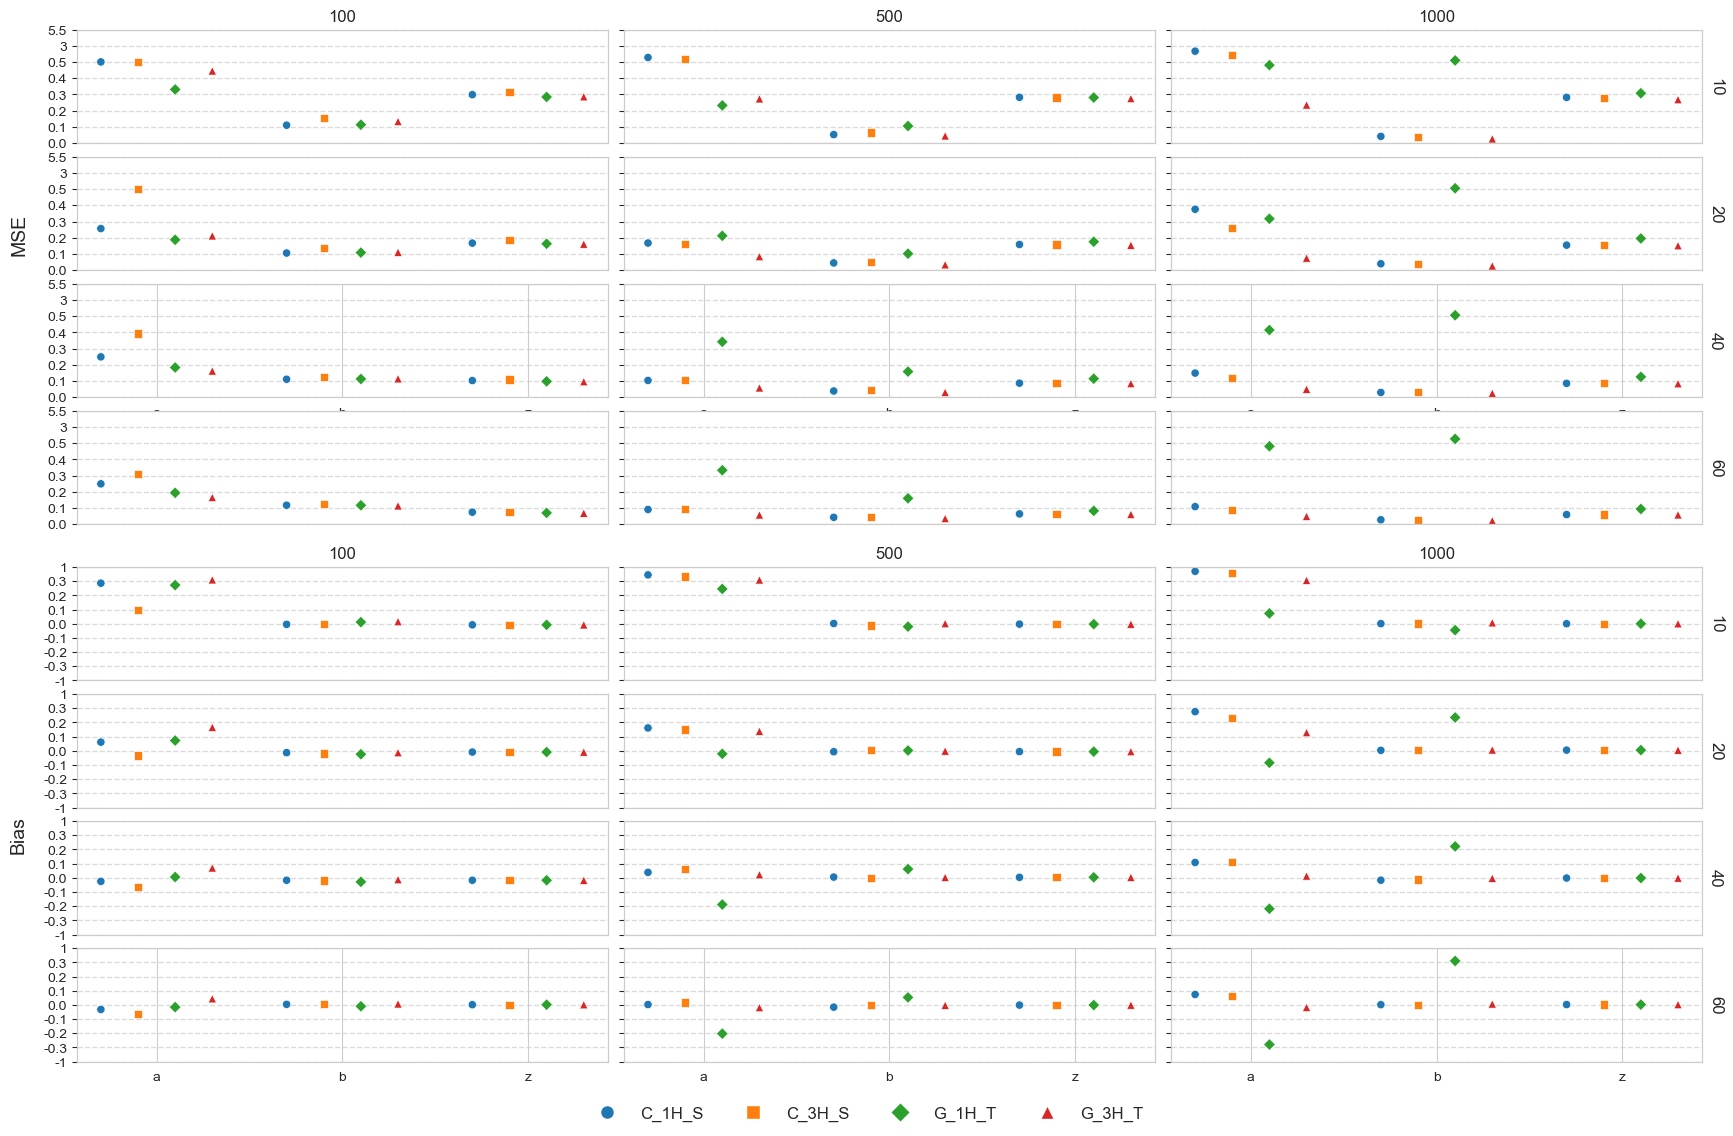

In [11]:
base_path = '../metrics_summary/sim1'
param_names = ['a','b','z']
formatted_df = read_and_format_data(base_path, param_names)
mse_ylim = (0, 0.5)
mse_beyond = [3, 5.5]
bias_ylim = (-0.3, 0.3)
bias_beyond = [-1, 1]
figsize = (18, 12)
plot_mse_bias(formatted_df, param_names, mse_ylim, mse_beyond, bias_ylim, bias_beyond, figsize,method_labels=['C_1H_S','C_3H_S','G_1H_T','G_3H_T'])

# 研究2

## 研究2-1

['I_1H_S' 'I_3H_S' 'Q_1H_T' 'Q_3H_T']


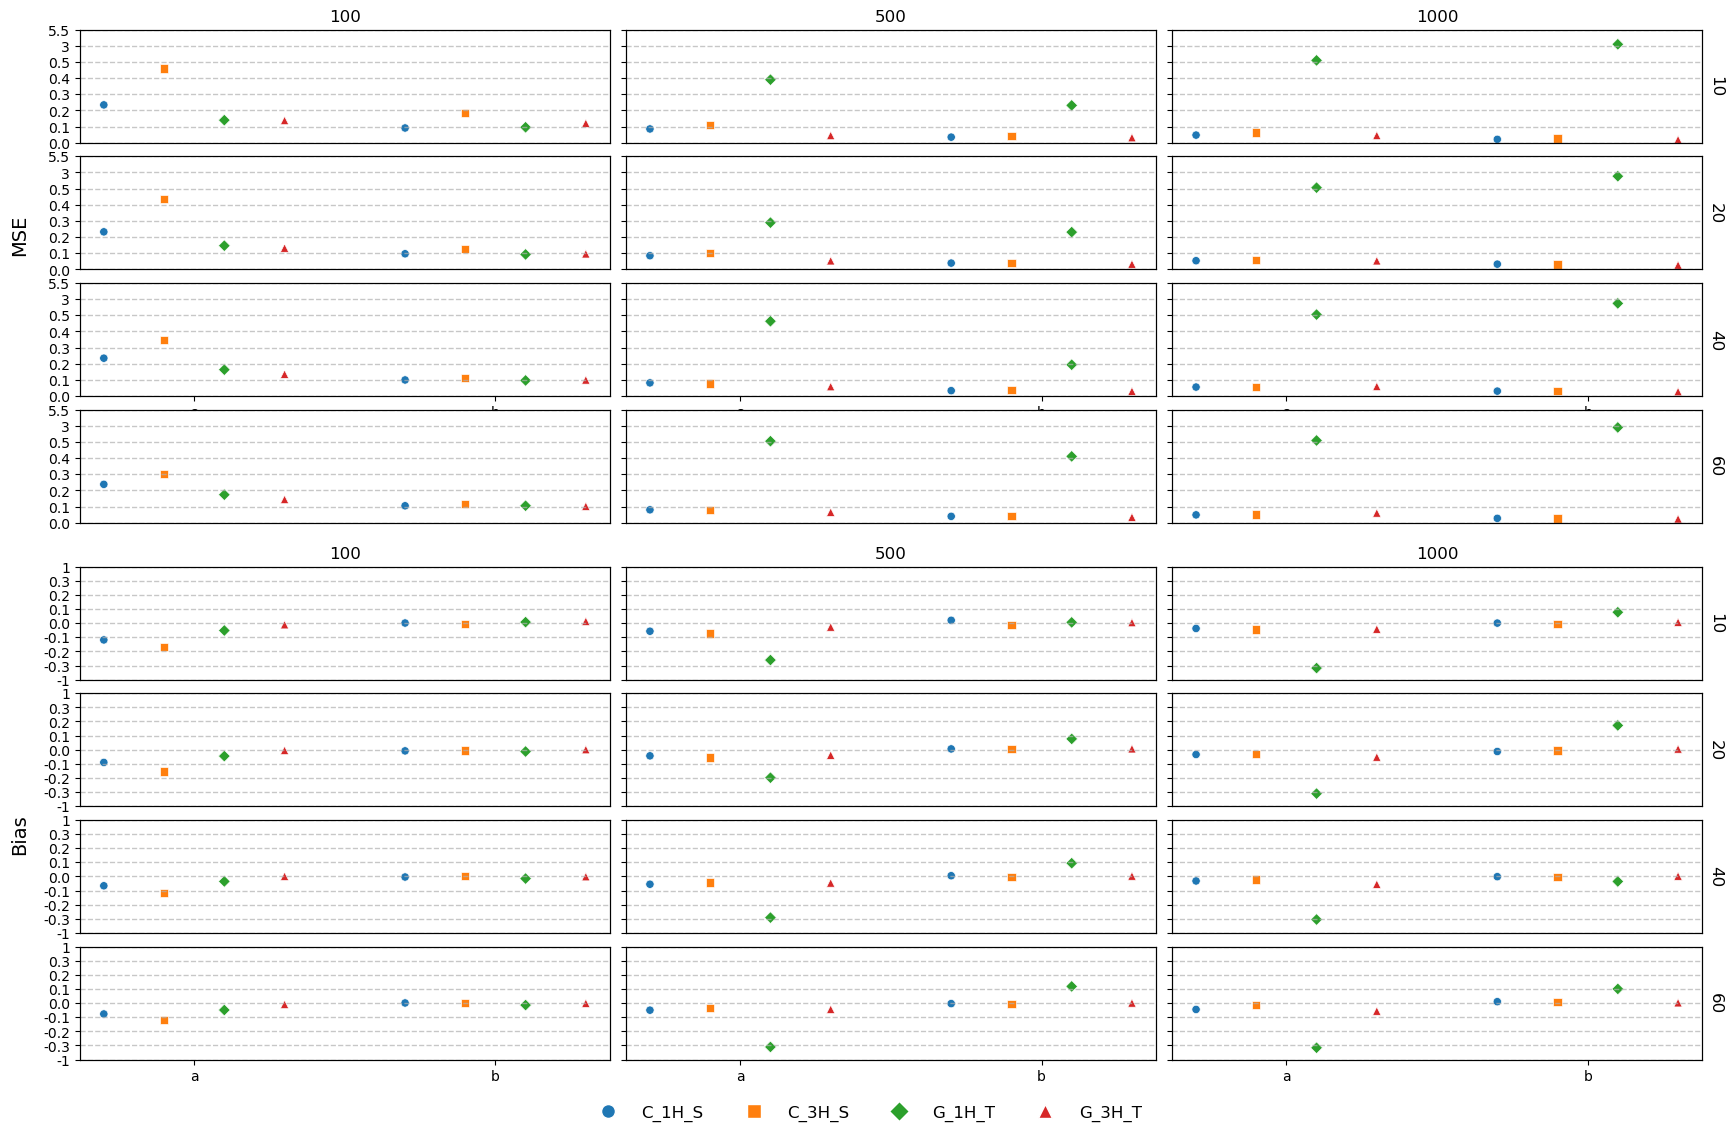

In [18]:
base_path = '../metrics_summary/sim2/res2_1'
param_names = ['a', 'b']
formatted_df = read_and_format_data(base_path, param_names)
mse_ylim = (0, 0.5)
mse_beyond = [3, 5.5]
bias_ylim = (-0.3, 0.3)
bias_beyond = [-1, 1]
figsize = (18, 12)
plot_mse_bias(formatted_df, param_names, mse_ylim, mse_beyond, bias_ylim, bias_beyond, figsize,filename='研究2a效果图.png',method_labels=['C_1H_S','C_3H_S','G_1H_T','G_3H_T'])

## 研究2-2

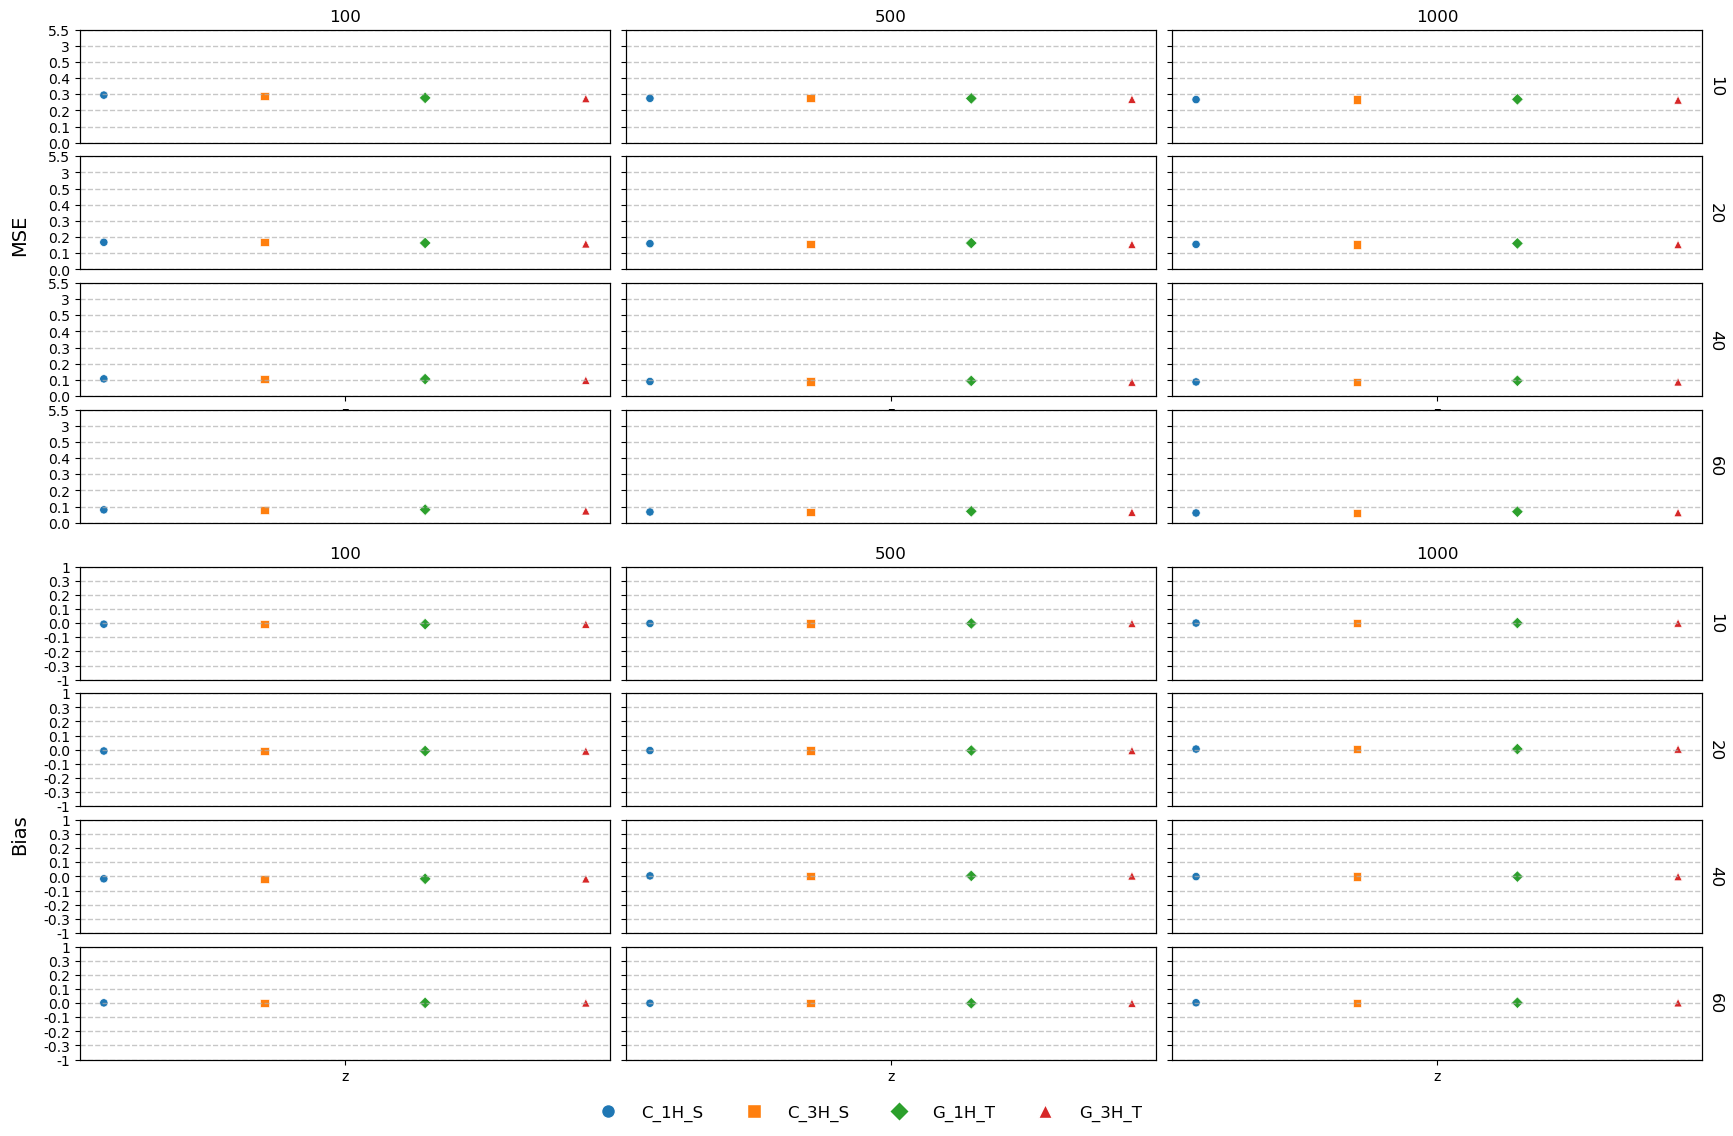

In [31]:
base_path = '../metrics_summary/sim2/res2_2'
param_names = ['z']
formatted_df = read_and_format_data(base_path, param_names)
mse_ylim = (0, 0.5)
mse_beyond = [3, 5.5]
bias_ylim = (-0.3, 0.3)
bias_beyond = [-1, 1]
figsize = (18, 12)
plot_mse_bias(formatted_df, param_names, mse_ylim, mse_beyond, bias_ylim, bias_beyond, figsize,filename='研究2b效果图.png',method_labels=['C_1H_S','C_3H_S','G_1H_T','G_3H_T'])

# 研究3

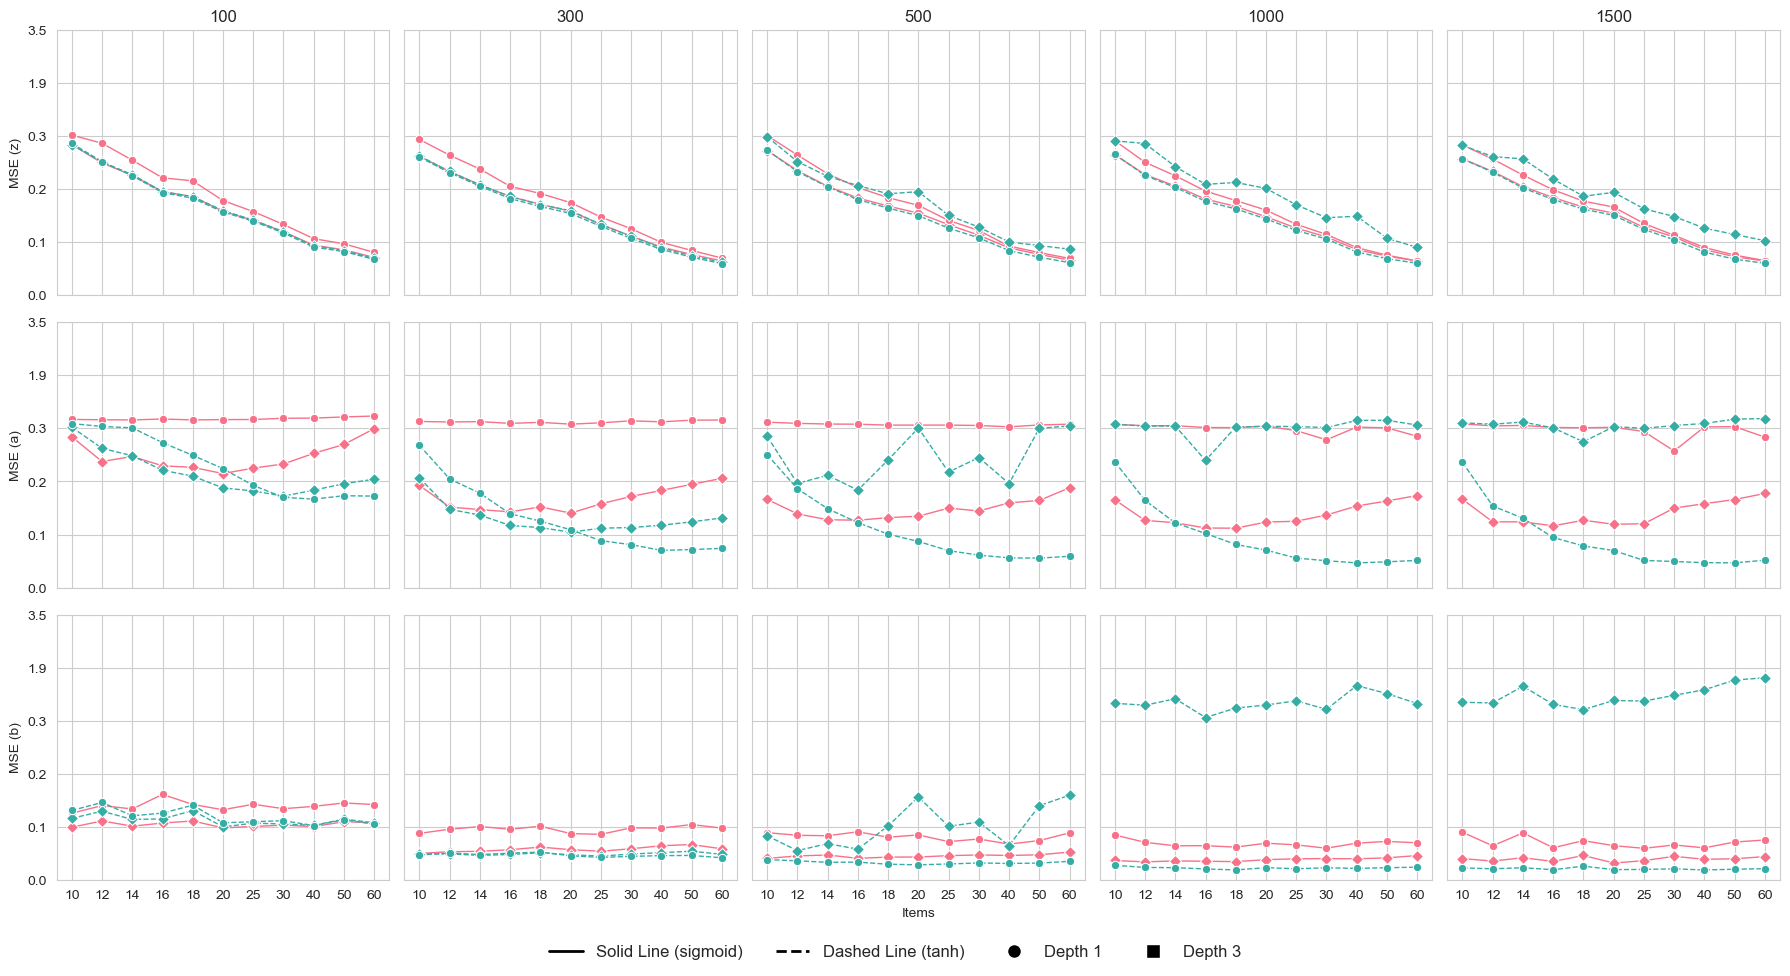

In [19]:
base_path = '../metrics_summary/sim3'
formatted_df = read_data_from_directory(base_path)
figsize = (18, 10)
mse_ylim = (0, 0.3)
mse_beyond = [1.9, 3.5]
bias_ylim = (-0.3, 0.3)
bias_beyond = [-1, 1]
plot_mse(formatted_df, figsize, mse_ylim, mse_beyond, bias_ylim, bias_beyond)

# 研究4

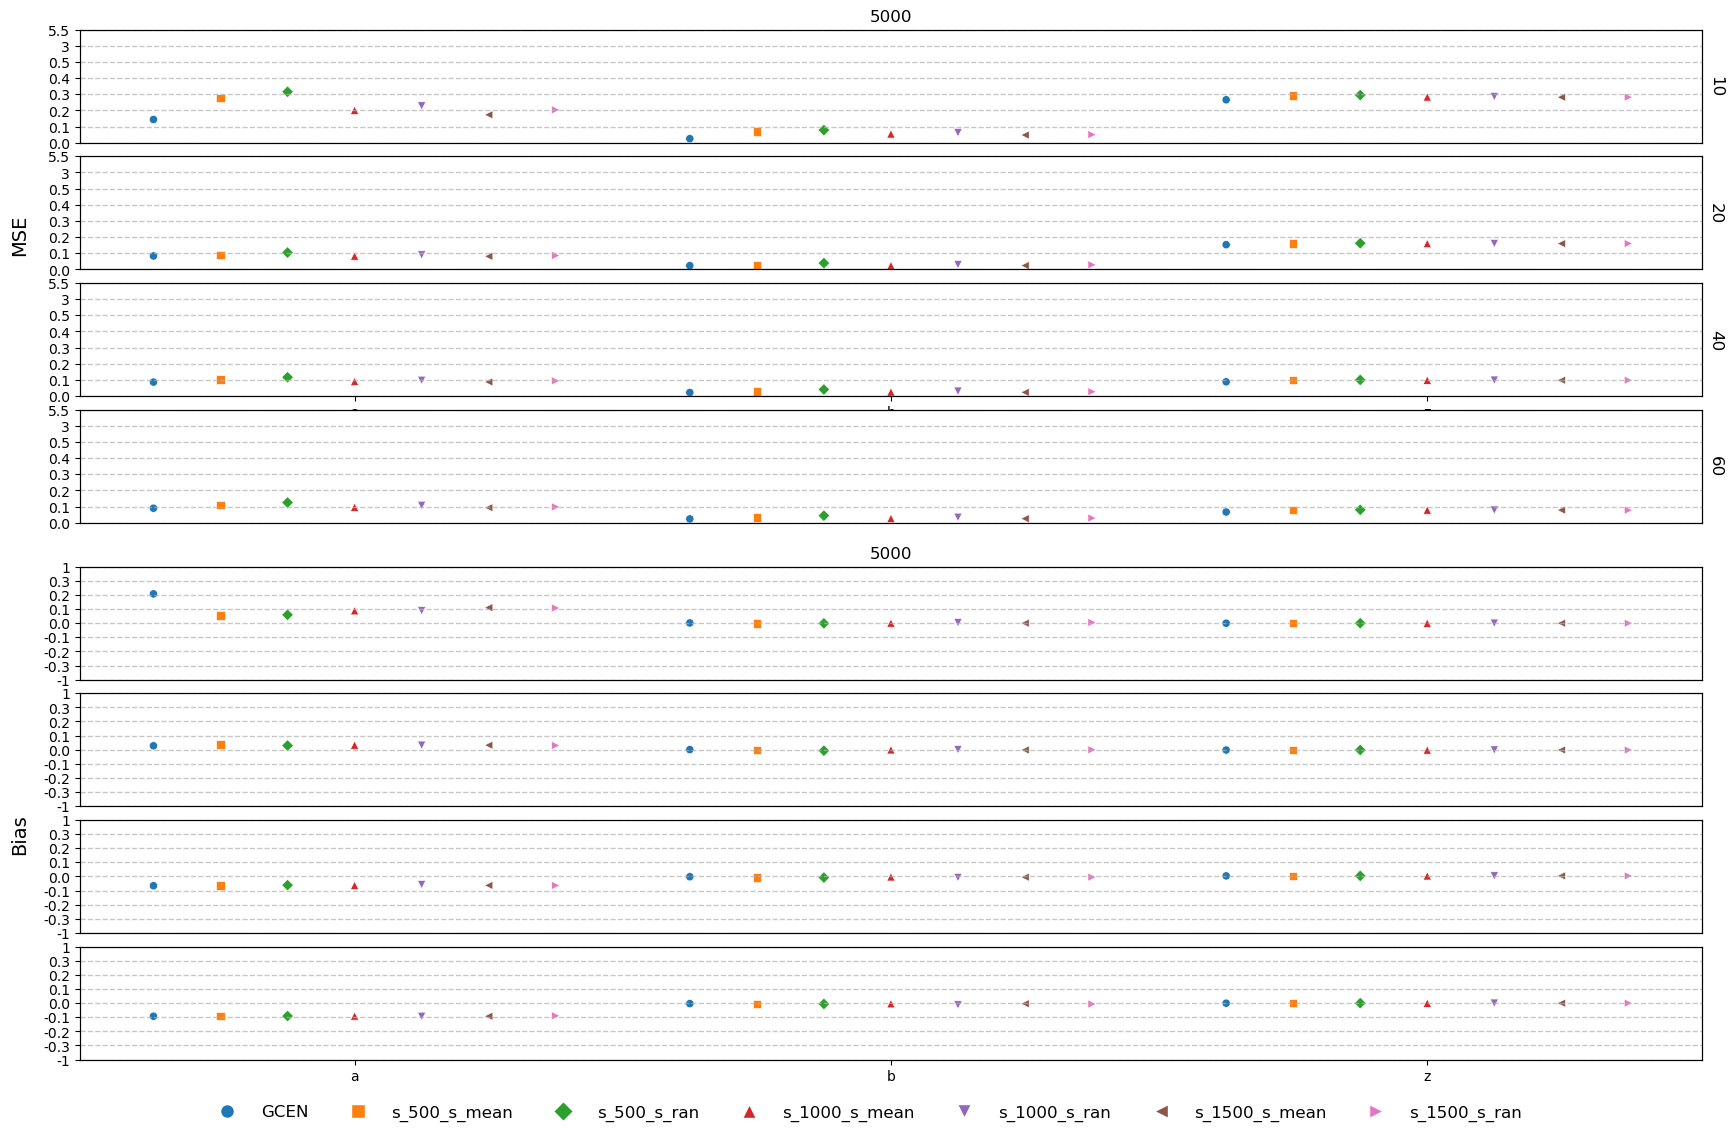

In [34]:
base_path = '../metrics_summary/sim4'
param_names = ['a','b','z']
formatted_df = read_and_format_data_2(base_path, param_names)
mse_ylim = (0, 0.5)
mse_beyond = [3, 5.5]
bias_ylim = (-0.3, 0.3)
bias_beyond = [-1, 1]
figsize = (18, 12)
plot_mse_bias_2(formatted_df, param_names, mse_ylim, mse_beyond, bias_ylim, bias_beyond, figsize,filename='研究4效果图.png',
              method_labels=['GCEN','s_500_s_mean','s_500_s_ran','s_1000_s_mean','s_1000_s_ran','s_1500_s_mean','s_1500_s_ran',])